In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
rnd_state = np.random.RandomState(33)

In [3]:
colors = cm.Set1(np.linspace(0, 1, 9))

In [4]:
def get_new_psi_brems(E, E_, rnd_state, is_degree=True, theta_star=1):
    epsilon = E - E_
    mu = 0.1057  # muon mass
    p = rnd_state.uniform(0, 1)
    r_max = np.minimum(1, E_/epsilon) * E * theta_star / mu
    a = p * r_max**2 / (1+r_max**2)
    r = np.sqrt(a/(1-a))
    theta_photon = mu / E * r
    theta_mu = epsilon / E_ * theta_photon
    
    if is_degree:
        return np.rad2deg(theta_mu)
    else:
        return theta_mu
    
def sandrock_rms_theta(E, E_):
    epsilon = E - E_
    theta_star = 1
    mu = 0.1057
    r_max = np.minimum(1, E_/epsilon) * E * theta_star / mu
    mean_squared_r = -1 + (1 + 1/r_max**2) * np.log(1 + r_max**2)
    
    rms_theta_photon = mu / E * np.sqrt(mean_squared_r)
    rms_theta_mu = epsilon / E_ * rms_theta_photon
    return rms_theta_mu

def get_brems_rms_theta_vG(E, E_, Z=82, m=0.10566):
    nu = (E - E_) / (E - m)
    if nu <= 0.5:
        k_1 = 0.092 * E**(-1/3)
        k_2 = 0.052 / E * Z**(-1/4)
        k_3 = 0.22 * E**(-0.92)
        rms_theta = np.max([np.min([k_1 * np.sqrt(nu), k_2]), k_3 * nu])
        return rms_theta
    if nu > 0.5:
        k_4 = 0.26 * E**(-0.91)
        m = 0.5
        d = 1.8
        n = 0.81 * E**m / (E**m + d)
        rms_theta = k_4 * nu**(1+n) * (1 - nu)**(-n)
        if rms_theta < 0.2:
            return rms_theta
    if nu > 0.5:
        print(nu)
        # k_5 = k_4 * nu**(1+n) * (1-nu)**(0.5-n) 
        nu_g = nu # * 0.999
        k_5 = k_4 * nu_g**(1+n) * (1-nu_g)**(0.5-n)
        rms_theta = k_5 * (1 - nu)**(-0.5)
        if rms_theta >= 0.2:
            # return 1
            print(nu, rms_theta)
            return rms_theta
    else:
        print('ERROR')
        


100%|██████████| 20/20 [00:00<00:00, 32.43it/s]


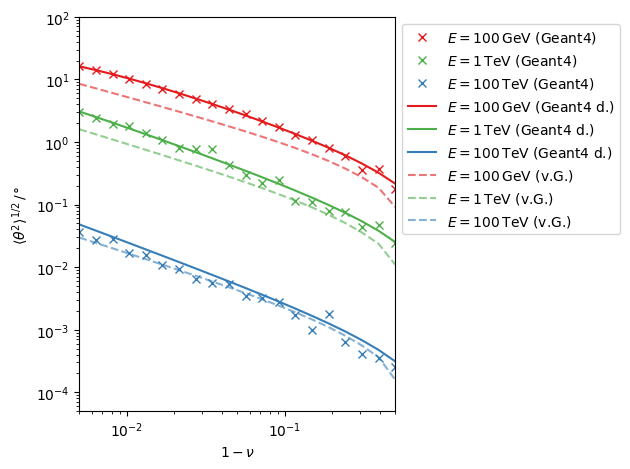

In [5]:
v = np.logspace(np.log10(5e-3), np.log10(0.5), 20)
nu = 1 - v

m = 0.10566

n_events =  10000 # 100000


E = 1e2 # 100 GeV
rms_thetas = []
for e in tqdm(nu):
    rms = np.array([])
    E_ = E - e * (E - m)
    angles = [get_new_psi_brems(E, E_, rnd_state, is_degree=True) for i in range(n_events)]
    rms = np.append(rms, angles)
    rms_thetas.append(np.sqrt(np.mean(rms**2)))
    
plt.plot(v, rms_thetas, 'x', color=colors[0], alpha=1, label=r'$E = 100\,$GeV (Geant4)')

E = 1e3 # 1 TeV
rms_thetas = []
for e in tqdm(nu):
    rms = np.array([])
    E_ = E - e * (E - m)
    angles = [get_new_psi_brems(E, E_, rnd_state, is_degree=True) for i in range(n_events)]
    rms = np.append(rms, angles)
    rms_thetas.append(np.sqrt(np.mean(rms**2))) 
plt.plot(v, rms_thetas, 'x', color=colors[2], alpha=1, label=r'$E = 1\,$TeV (Geant4)')


E = 1e5 # 100 TeV
rms_thetas = []
for e in tqdm(nu):
    rms = np.array([])
    E_ = E - e * (E - m)
    angles = [get_new_psi_brems(E, E_, rnd_state, is_degree=True) for i in range(n_events)]
    rms = np.append(rms, angles)
    rms_thetas.append(np.sqrt(np.mean(rms**2)))    
plt.plot(v, rms_thetas, 'x', color=colors[1], alpha=1, label=r'$E = 100\,$TeV (Geant4)')


E = 1e2 # GeV
E_ = E - nu * (E - m)
values = [sandrock_rms_theta(E, E__) for E__ in E_]
plt.plot(v, np.rad2deg(values), '-', color=colors[0], alpha=1, label=r'$E = 100\,$GeV (Geant4 d.)')

E = 1e3 # GeV
E_ = E - nu * (E - m)
values = [sandrock_rms_theta(E, E__) for E__ in E_]
plt.plot(v, np.rad2deg(values), '-', color=colors[2], alpha=1, label=r'$E = 1\,$TeV (Geant4 d.)')  

E = 1e5 # GeV
E_ = E - nu * (E - m)
values = [sandrock_rms_theta(E, E__) for E__ in E_]
plt.plot(v, np.rad2deg(values), '-', color=colors[1], alpha=1, label=r'$E = 100\,$TeV (Geant4 d.)')  



E = 1e2
E_ = E - nu * (E - m)
values = [get_brems_rms_theta_vG(E, E__, Z=1) for E__ in E_]
plt.plot(v, np.rad2deg(values), '--', color=colors[0], alpha=0.6, label=r'$E = 100\,$GeV (v.G.)')

E = 1e3
E_ = E - nu * (E - m)
values = [get_brems_rms_theta_vG(E, E__, Z=1) for E__ in E_]
plt.plot(v, np.rad2deg(values), '--', color=colors[2], alpha=0.6, label=r'$E = 1\,$TeV (v.G.)')


E = 1e5
E_ = E - nu * (E - m)
values = [get_brems_rms_theta_vG(E, E__, Z=1) for E__ in E_]
plt.plot(v, np.rad2deg(values), '--', color=colors[1], alpha=0.6, label=r'$E = 100\,$TeV (v.G.)')



plt.xlabel(r'$1 - \nu$')
plt.ylabel(r'$\langle\theta^2\rangle^{1/2}\,/\,°$')
plt.xscale('log')
plt.yscale('log')
plt.xlim(5e-3, 0.5)
plt.ylim(5e-5, 1e2)
plt.legend(bbox_to_anchor=(1,1), ncol=1)
plt.tight_layout()
# plt.savefig(d+'/brems_compare_rms_theta_high_Z1_degree4.pdf')

In [6]:
def get_new_psi_brems_ginneken_Eq6(E, E_, Z, m=0.10566):
    nu = (E - E_) / (E - m)
    
    k_1 = 0.092 * E**(-1/3)
    k_2 = 0.052 / E * Z**(-1/4)
    k_3 = 0.22 * E**(-0.92)
    rms_theta = np.max([np.min([k_1 * np.sqrt(nu), k_2]), k_3 * nu])
    if nu <= 0.5:    
        return rms_theta
    if (nu > 0.5) & (rms_theta < 0.2):
        k_4 = 0.26 * E**(-0.91)
        n = 0.81 * E**(0.5) / (E**(0.5) + 1.8)
        rms_theta = k_4 * nu**(1+n) * (1-nu)**(-n)
        return rms_theta
    if (nu > 0.5) & (rms_theta >= 0.2):
        n = 0.81 * E**(0.5) / (E**(0.5) + 1.8)
        k_4 = 0.26 * E**(-0.91) 
        k_5 = k_4 * nu**(1+n) * (1-nu)**(0.5-n)
        rms_theta = k_5 * (1-nu)**(-0.5)
        return rms_theta
    else:
        print('no case choosen')

def get_brems_rms_theta_vG(E, E_, Z=82, m=0.10566):
    nu = (E - E_) / (E - m)
    if nu <= 0.5:
        k_1 = 0.092 * E**(-1/3)
        k_2 = 0.052 / E * Z**(-1/4)
        k_3 = 0.22 * E**(-0.92)
        rms_theta = np.max([np.min([k_1 * np.sqrt(nu), k_2]), k_3 * nu])
        return rms_theta
    if nu > 0.5:
        k_4 = 0.26 * E**(-0.91)
        m = 0.5
        d = 1.8
        n = 0.81 * E**m / (E**m + d)
        rms_theta = k_4 * nu**(1+n) * (1 - nu)**(-n)
        if rms_theta < 0.2:
            return rms_theta
    if nu > 0.5:
        print(nu)
        # k_5 = k_4 * nu**(1+n) * (1-nu)**(0.5-n) 
        nu_g = nu # * 0.999
        k_5 = k_4 * nu_g**(1+n) * (1-nu_g)**(0.5-n)
        rms_theta = k_5 * (1 - nu)**(-0.5)
        if rms_theta >= 0.2:
            # return 1
            print(nu, rms_theta)
            return rms_theta
    else:
        print('ERROR')

 10%|█         | 1/10 [00:00<00:03,  2.98it/s]

rms =  2.2019662628860627e-07


 20%|██        | 2/10 [00:00<00:02,  3.13it/s]

rms =  9.355055963573219e-07


 30%|███       | 3/10 [00:00<00:02,  3.15it/s]

rms =  4.43219617562922e-06


 40%|████      | 4/10 [00:01<00:01,  3.15it/s]

rms =  1.595902793350777e-05


 50%|█████     | 5/10 [00:01<00:01,  3.17it/s]

rms =  8.974118363464111e-05


 60%|██████    | 6/10 [00:01<00:01,  3.19it/s]

rms =  0.00031459435986121143


 70%|███████   | 7/10 [00:02<00:00,  3.21it/s]

rms =  0.0012801419691821202


 80%|████████  | 8/10 [00:02<00:00,  3.23it/s]

rms =  0.006361479213340645


 90%|█████████ | 9/10 [00:02<00:00,  3.23it/s]

rms =  0.02611823321512728


100%|██████████| 10/10 [00:03<00:00,  3.20it/s]


rms =  0.24593384643166746


100%|██████████| 10/10 [00:03<00:00,  3.25it/s]


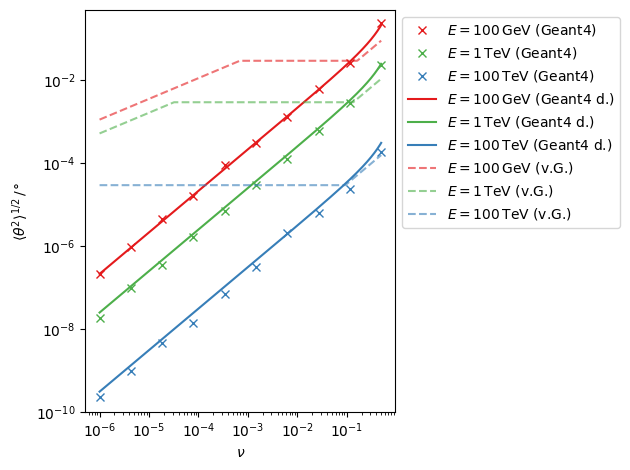

In [7]:
nu = np.logspace(-6,np.log10(0.5), 10)
n_events = 100000 # 10000
m = 0.1057
        
        
E = 1e2 # 100 GeV
rms_thetas = []
rms_thetas_err = np.array([])
low = []
up = []
maximums = []
for e in tqdm(nu):
    thetas = np.array([])
    # E_ = (1-e) * E
    E_ = E - e * (E - m)
    angles = [get_new_psi_brems(E, E_, rnd_state, is_degree=True) for i in range(n_events)]
    thetas = np.append(thetas, angles)
    rms = np.sqrt(np.mean(thetas**2))
    print('rms = ', rms)
    rms_thetas.append(rms)
    
plt.plot(nu, rms_thetas, 'x', color=colors[0], label=r'$E = 100\,$GeV (Geant4)')
# plt.errorbar(nu, maximums, yerr=[low, up], fmt='.', color=colors[0], alpha=0.5, label='max')

E = 1e3 # 1 TeV
rms_thetas = []
rms_thetas_err = []
for e in tqdm(nu):
    rms = np.array([])
    # E_ = (1-e) * E
    E_ = E - e * (E - m)
    angles = [get_new_psi_brems(E, E_, rnd_state, is_degree=True) for i in range(n_events)]
    rms = np.append(rms, angles)
    rms_thetas.append(np.sqrt(np.mean(rms**2)))
    rms_thetas_err.append(np.std(rms_thetas))    
plt.plot(nu, rms_thetas, 'x', color=colors[2], label=r'$E = 1\,$TeV (Geant4)')
# plt.errorbar(nu, rms_thetas, yerr=rms_thetas_err, fmt='x', color=colors[1], label=r'$E = 1\,$TeV (Geant4)') 

E = 1e5 # 1 TeV
rms_thetas = []
rms_thetas_err = []
for e in tqdm(nu):
    rms = np.array([])
    # E_ = (1-e) * E
    E_ = E - e * (E - m)
    angles = [get_new_psi_brems(E, E_, rnd_state, is_degree=True) for i in range(n_events)]
    rms = np.append(rms, angles)
    rms_thetas.append(np.sqrt(np.mean(rms**2)))
    rms_thetas_err.append(np.std(rms_thetas))    
plt.plot(nu, rms_thetas, 'x', color=colors[1], label=r'$E = 100\,$TeV (Geant4)')
# plt.errorbar(nu, rms_thetas, yerr=rms_thetas_err, fmt='x', color=colors[1], label=r'$E = 1\,$TeV (Geant4)') 


nu = np.logspace(-6,np.log10(0.5), 500)

    
E = 1e2 # GeV
m = 0.1057
E_ = E - nu * (E - m)
values = [sandrock_rms_theta(E, E__) for E__ in E_]
plt.plot(nu, np.rad2deg(values), '-', color=colors[0], alpha=1, label=r'$E = 100\,$GeV (Geant4 d.)')

E = 1e3 # GeV
E_ = E - nu * (E - m)
values = [sandrock_rms_theta(E, E__) for E__ in E_]
plt.plot(nu, np.rad2deg(values), '-', color=colors[2], alpha=1, label=r'$E = 1\,$TeV (Geant4 d.)')  

E = 1e5 # GeV
E_ = E - nu * (E - m)
values = [sandrock_rms_theta(E, E__) for E__ in E_]
plt.plot(nu, np.rad2deg(values), '-', color=colors[1], alpha=1, label=r'$E = 100\,$TeV (Geant4 d.)')  
    

E = 100 # GeV
m = 0.1057
E_ = E - nu * (E - m)
values = [get_new_psi_brems_ginneken_Eq6(E, E__, Z=1) for E__ in E_]
plt.plot(nu, np.rad2deg(values), '--', color=colors[0], alpha=0.6, label=r'$E = 100\,$GeV (v.G.)')

E = 1000 # GeV
E_ = E - nu * (E - m)
values = [get_new_psi_brems_ginneken_Eq6(E, E__, Z=1) for E__ in E_]
plt.plot(nu, np.rad2deg(values), '--', color=colors[2], alpha=0.6, label=r'$E = 1\,$TeV (v.G.)')

E = 1e5 # GeV
E_ = E - nu * (E - m)
values = [get_new_psi_brems_ginneken_Eq6(E, E__, Z=1) for E__ in E_]
plt.plot(nu, np.rad2deg(values), '--', color=colors[1], alpha=0.6, label=r'$E = 100\,$TeV (v.G.)')

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\nu$')
plt.ylabel(r'$\langle\theta^2\rangle^{1/2}\,/\,°$')
plt.legend(bbox_to_anchor=(1,1), ncol=1)
plt.ylim(1e-10, 5e-1)
plt.tight_layout()
# plt.savefig(d+'/brems_compare_rms_theta_low_degree.pdf', bbox_inches='tight')

0.998999599977336
0.998999599977336 0.45023896809438246


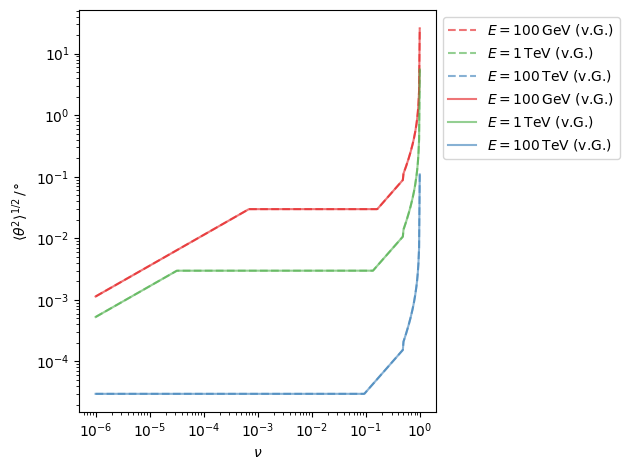

In [8]:
nu = np.logspace(-6,np.log10(0.999), 500)
v = 1 - nu

E = 1e2
E_ = E - nu * (E - m)
values = [get_brems_rms_theta_vG(E, E__, Z=1) for E__ in E_]
plt.plot(nu, np.rad2deg(values), '--', color=colors[0], alpha=0.6, label=r'$E = 100\,$GeV (v.G.)')

E = 1e3
E_ = E - nu * (E - m)
values = [get_brems_rms_theta_vG(E, E__, Z=1) for E__ in E_]
plt.plot(nu, np.rad2deg(values), '--', color=colors[2], alpha=0.6, label=r'$E = 1\,$TeV (v.G.)')


E = 1e5
E_ = E - nu * (E - m)
values = [get_brems_rms_theta_vG(E, E__, Z=1) for E__ in E_]
plt.plot(nu, np.rad2deg(values), '--', color=colors[1], alpha=0.6, label=r'$E = 100\,$TeV (v.G.)')

E = 100 # GeV
m = 0.1057
E_ = E - nu * (E - m)
values = [get_new_psi_brems_ginneken_Eq6(E, E__, Z=1) for E__ in E_]
plt.plot(nu, np.rad2deg(values), '-', color=colors[0], alpha=0.6, label=r'$E = 100\,$GeV (v.G.)')

E = 1000 # GeV
E_ = E - nu * (E - m)
values = [get_new_psi_brems_ginneken_Eq6(E, E__, Z=1) for E__ in E_]
plt.plot(nu, np.rad2deg(values), '-', color=colors[2], alpha=0.6, label=r'$E = 1\,$TeV (v.G.)')

E = 1e5 # GeV
E_ = E - nu * (E - m)
values = [get_new_psi_brems_ginneken_Eq6(E, E__, Z=1) for E__ in E_]
plt.plot(nu, np.rad2deg(values), '-', color=colors[1], alpha=0.6, label=r'$E = 100\,$TeV (v.G.)')

plt.xlabel(r'$\nu$')
plt.ylabel(r'$\langle\theta^2\rangle^{1/2}\,/\,°$')
plt.xscale('log')
plt.yscale('log')
# plt.xlim(5e-3, 0.5)
# plt.ylim(5e-5, 1e2)
plt.legend(bbox_to_anchor=(1,1), ncol=1)
plt.tight_layout()